# Ex2 - Gaussian Kernel

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
data = sio.loadmat("./ex6data2.mat")
X, y = data["X"], data["y"]
y = y.reshape(y.shape[0],)
X.shape, y.shape

((863, 2), (863,))

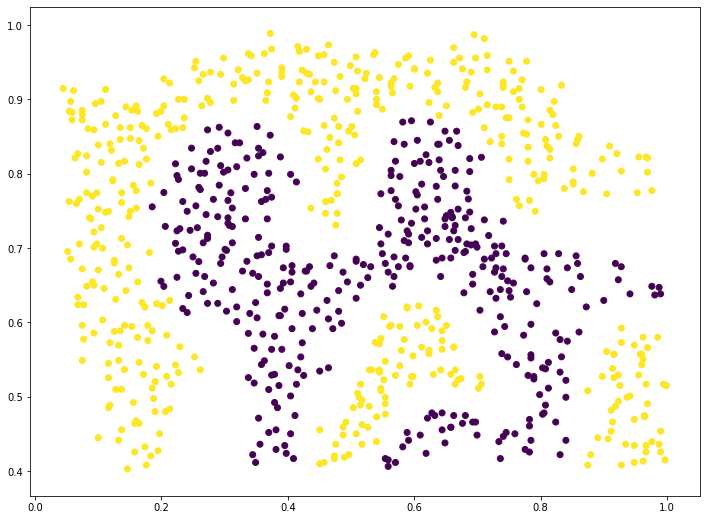

In [3]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((690, 2), (173, 2), (690,), (173,))

# Kernel
# Similarity
A measure of how similar a training sample to a landmarks. The landmarks are the new features.
# Gaussian kernel
Gaussian kernel evaluate the similarity (0-1) between a training sample $x$ and a landmark.
$$
\text { similarity }\left(x, l^{(i)}\right)=e\left(-\frac{\left\|x-l^{(i)}\right\|^{2}}{2 \sigma^{2}}\right)
$$
$\|x-l^{(i)}\|^2$ is the sum of distance between all landmarks $l^{(i)}$.
# Choose of landmarks
The size of the training set $m$ is the number of the landmarks. Also let $l^{(i)} = x^{(i)}$ so that every training sample is at least most similar to a landwark. Every training sample is similary to the bias landmark.
$$
x^{(i)} \operatorname{ maps } f^{(i)}=\left[\begin{array}{c}
{f_{0}^{(i)}=1} \\
{f_{1}^{(i)}=\operatorname{sim}\left(x^{(i)}, l^{(1)}\right)} \\
{f_{2}^{(i)}=\operatorname{sim}\left(x^{(i)}, l^{(1)}\right)} \\
...\\
{f_{i}^{(i)}=\operatorname{sim}\left(x^{(i)}, l^{(i)}
\right)=e^{0}=1} \\
... \\
{f_{m}^{(i)}=\operatorname{sim}\left(x^{(i)}, l^{(m)}\right)}
\end{array}\right]
$$
$$
F=\left[\begin{array}{c}
{f_{0}} \\
{f_{1}} \\
{f_{2}} \\
{\vdots} \\
{f_{m}}
\end{array}\right] 
=\left[\begin{array}{c}
\left[{f^{(0..m)}_{0}}\right] = 1 \\
\left[{f^{(0..m)}_{1}}\right] \\
\left[{f^{(0..m)}_{2}}\right] \\
{\vdots} \\
\left[{f^{(0..m)}_{m}}\right]
 \end{array}\right]
$$

Now we can replace X with F. 

$$
\min C \sum_{i=1}^{m}\left[y^{(i)} \operatorname{cost}_{1}\left(\theta^{T} f^{(i)}\right)+\left(1-y^{(i)}\right) \operatorname{cost}_{0}\left(\theta^{T} f^{(i)}\right)\right]+\frac{1}{2} \sum_{j=1}^{n=m} \theta_{j}^{2}
$$

For a given $x^{(i)}$, calculate the $f^{(i)}$, when $\theta^Tf^{(i)} >= 0$, predict $y = 1$, otherwise predict $y = 0$. **Note that the $\theta$ is a new (randomly initialized) parameter vector, not the one from $X$.**

In [5]:
from sklearn.svm import SVC
svc = SVC(C=1000, kernel="rbf", gamma=10, probability=True)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9826589595375722

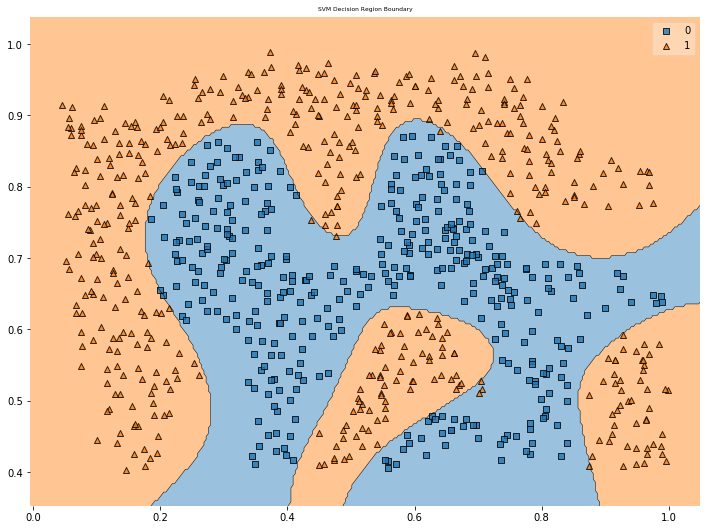

In [6]:
from mlxtend.plotting import plot_decision_regions
plt.subplots(figsize=(12,9))
ax = plot_decision_regions(X=X, y=y, clf=svc)
ax.set_xlim([X[:,0].min()-0.05, X[:,0].max()+0.05])
ax.set_ylim([X[:,1].min()-0.05, X[:,1].max()+0.05])
plt.title('SVM Decision Region Boundary', size=6)
plt.show()